# -- Project Name - AirBnb Booking Analysis

Project Type - EDA<br>
Contribution - Team<br>
Team Member 1 - Divyansh Singh Negi<br>
Team Member 2 -Saurabhi<br>

# -- Project Summary :

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

This project aims to analyze hotel booking data to gain insights and make data-driven decisions for improving the hotel's operations and customer experience. By examining various aspects of the data, such as booking patterns, customer preferences, and revenue trends, the project seeks to provide valuable information to optimize resource allocation, marketing strategies, and overall hotel performance.

Objectives:<br> 1.Understand booking patterns<br> 2.Customer segmentation<br> 3.Revenue analysis <br>4.Demand forecasting <br>5.Customer feedback analysis <br>6.Competitor analysis<br>

# -- Problem Statement :

Explore and analyze the data to discover key understandings (not limited to these) such as:

- What can we learn about different hosts and areas?

- What can we learn from predictions? (ex: locations, prices, reviews, etc)

- Which hosts are the busiest and why?

- Is there any noticeable difference of traffic among different areas and what could be the reason for it?

# -- Code :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
url='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.shape

(48895, 16)

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### OBSERVATIONS :

- Total 16 columns are present in the dataset.
- total observations are 48895.
- Min of Price variable is 0, max is 10000.
- Mean price is 152.
- On an average people stay 7 days in a room.
- There are total four columns with null values.

# -- Missing value handling :

In [9]:
newdf = df.copy()

In [10]:
df.reviews_per_month.fillna(value = 0, inplace = True)

In [11]:
df['last_review'] = pd.to_datetime(df['last_review'], format = '%Y-%m-%d')
df.last_review = df['last_review'].dt.year.astype('object')
df.last_review.fillna(value = 'Never', inplace = True)

In [12]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

#### Since 'name' and 'host_name' occupy a very small margin of the data and won't effect our analysis we let them be.

In [13]:
df.groupby(['last_review']).count()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
last_review,,,,,,,,,,,,,,,
2011.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2012.0,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
2013.0,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
2014.0,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199
2015.0,1393,1391,1393,1390,1393,1393,1393,1393,1393,1393,1393,1393,1393,1393,1393
2016.0,2707,2704,2707,2706,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707
2017.0,3205,3205,3205,3203,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205
2018.0,6050,6049,6050,6048,6050,6050,6050,6050,6050,6050,6050,6050,6050,6050,6050
2019.0,25209,25209,25209,25201,25209,25209,25209,25209,25209,25209,25209,25209,25209,25209,25209


# -- Analysis begin :

In [14]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [15]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018.0,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019.0,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Never,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019.0,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018.0,0.10,1,0


# 1. Location of neighbouthood

Text(0.5, 0, 'Neighbourhood')

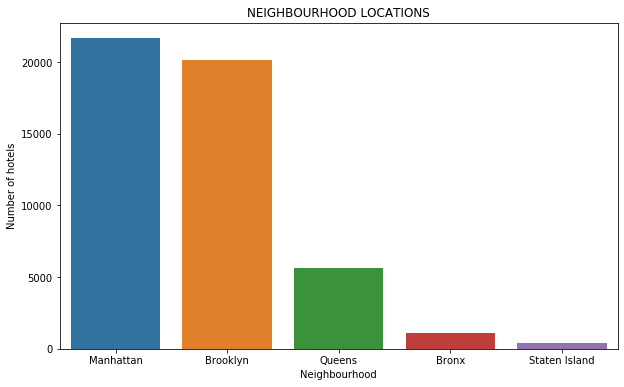

In [16]:
df1 = df.groupby(['neighbourhood_group'],as_index=False).count()
fig, ax = plt.subplots(figsize=(10, 6))
a=sns.barplot(data=df1, x="neighbourhood_group",y='id',order=df1.sort_values('id',ascending = False).neighbourhood_group)

a.set_title('NEIGHBOURHOOD LOCATIONS')
a.set_ylabel('Number of hotels')
a.set_xlabel('Neighbourhood')

#### Observation :
- that most of the hotels are located in the Manhattan Area
- And least hotels are in the State Island area

# 2. Types of room in each location

Text(0.5, 0, 'Neighbourhood')

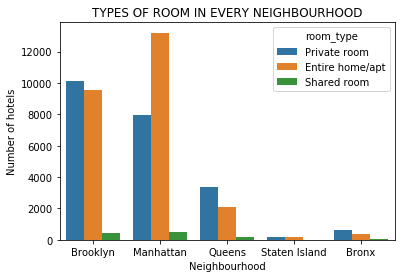

In [17]:
# fig, ax = plt.subplots(figsize=(12, 6))
a=sns.countplot(data=df, x="neighbourhood_group", hue="room_type")
a.set_title('TYPES OF ROOM IN EVERY NEIGHBOURHOOD')
a.set_ylabel('Number of hotels')
a.set_xlabel('Neighbourhood')

#### Observation :
- Most rooms are of Entire home/apt type
- Shared rooms are the least in numbers
- This might mean that the entire home/apt type rooms are in most demand.

# 3. Types of room and the mean prices per person

Text(0.5, 0, 'Type of Rooms')

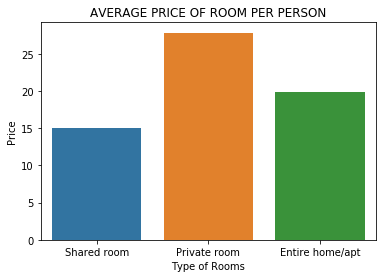

In [18]:
df2=df.groupby(['room_type'],as_index=False).agg({'price':"mean","calculated_host_listings_count":"mean"}).sort_values(by='price')
df2['avg. pay per person'] = df2['price']/df2['calculated_host_listings_count']
# fig, ax = plt.subplots(figsize=(12, 8))
a=sns.barplot(data=df2, x="room_type", y="avg. pay per person")
a.set_title('AVERAGE PRICE OF ROOM PER PERSON')
a.set_ylabel('Price')
a.set_xlabel('Type of Rooms')

#### Observation:
- Shared rooms are the most affordable per person
- Private rooms are the most expensive per person

# 4. Avg. time stay in each type of room

Text(0.5, 0, 'Type of Rooms')

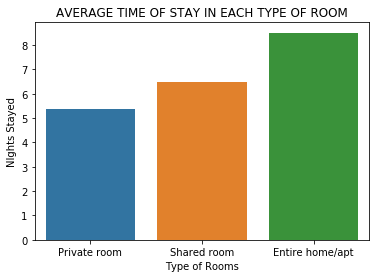

In [19]:
df3=df.groupby(['room_type'],as_index=False).agg({'minimum_nights':"mean"}).sort_values(by='minimum_nights')
# fig, ax = plt.subplots(figsize=(12, 8))
a= sns.barplot(data=df3, x="room_type", y="minimum_nights")
a.set_title('AVERAGE TIME OF STAY IN EACH TYPE OF ROOM')
a.set_ylabel('NIghts Stayed')
a.set_xlabel('Type of Rooms')

#### Observation :
- People who book Entire home/apt stay longer as compared to People who book Private room

# 5. Hotels used every year

Text(0.5, 0, 'Count of hotels booked')

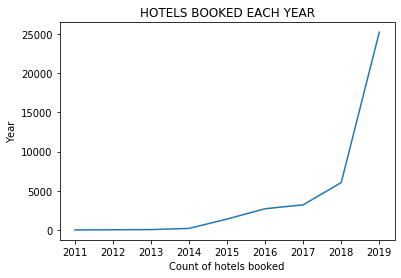

In [20]:
df4=df.groupby(['last_review'],as_index=False).count()
df4.drop([9],axis=0,inplace=True)
df4
# fig, ax = plt.subplots(figsize=(12, 8))
a=sns.lineplot(data=df4, x="last_review", y="id")
a.set_title('HOTELS BOOKED EACH YEAR')
a.set_ylabel('Year')
a.set_xlabel('Count of hotels booked')

#### Observation :
- The usage of hotels has significantly increased in the last few years
- This means that opening a hotel is a profitable business

# 6. Room type v/s No. of people 

Text(0.5, 0, 'Type of Rooms')

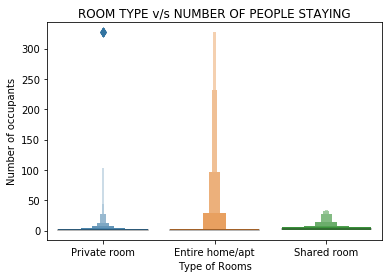

In [21]:
# fig, ax = plt.subplots(figsize=(12, 8))
a=sns.boxenplot(data=df, x="room_type", y="calculated_host_listings_count")
a.set_title('ROOM TYPE v/s NUMBER OF PEOPLE STAYING')
a.set_ylabel('Number of occupants')
a.set_xlabel('Type of Rooms')

#### Observation:

 - We observe that usually when the number of people is higher , bigger rooms are booked

# 7. Neighbourhood with most no. of hotels

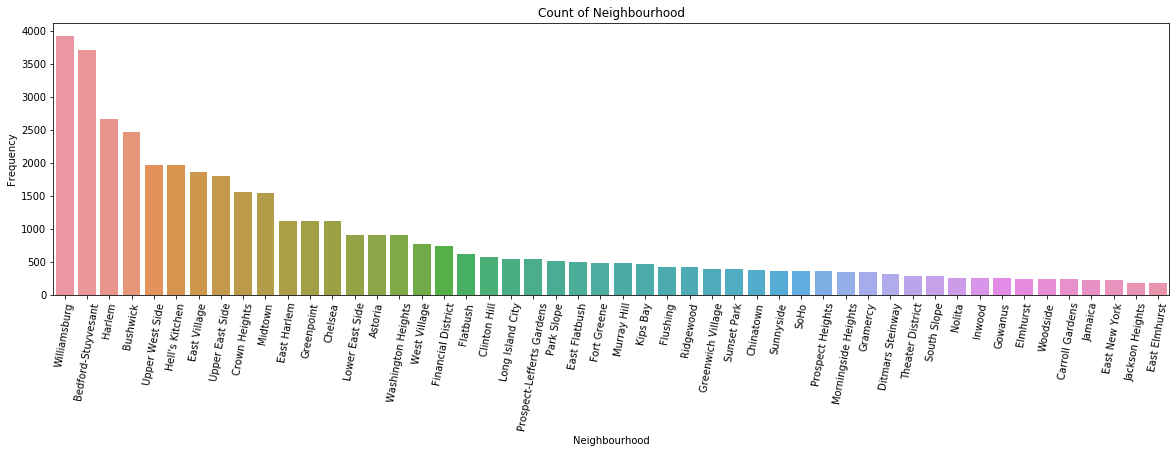

In [22]:
df5 = df.groupby(['neighbourhood'],as_index=False).count()

top_50_=Counter(df['neighbourhood']).most_common()
top_50_=top_50_[0:50]

plt.figure(figsize=(20,5))
a = sns.barplot(x='neighbourhood',y='count',data = pd.DataFrame(top_50_,columns=['neighbourhood','count'][:20]))
a.set_title('Count of Neighbourhood')
a.set_ylabel('Frequency')
a.set_xlabel('Neighbourhood')
a.set_xticklabels(a.get_xticklabels(), rotation=80);
plt.show()

#### Observation:

- List of top 50 neighbourhood with most no. of hotels

# 8. No. of nights v/s No. of reviews 

Text(0.5, 0, 'Number of Reviews')

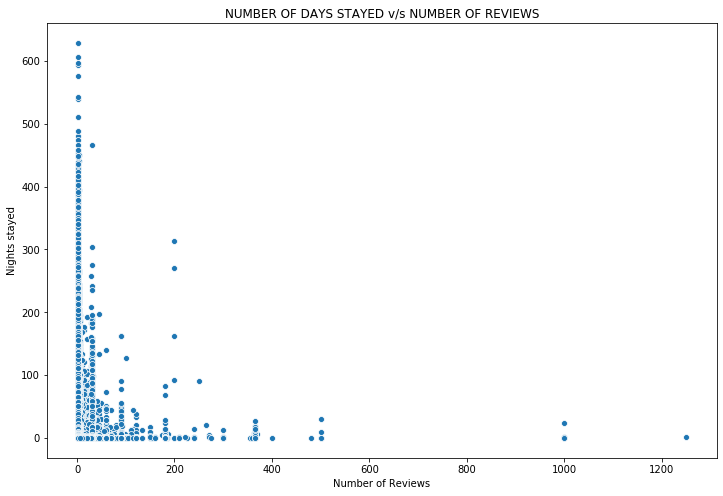

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
a=sns.scatterplot(data=df, x="minimum_nights", y="number_of_reviews")
a.set_title('NUMBER OF DAYS STAYED v/s NUMBER OF REVIEWS')
a.set_ylabel('Nights stayed')
a.set_xlabel('Number of Reviews')

#### Observation:

- We can see that the lower of no. of nights stays , higher is the review number
- This can also mean that people prefer to stay a lower number of days at hotels based on number of reviews given
- As number of nights to stay increase , number of review decrease , this can be due to two reasons:
    1. Lesser people stay at hotel for a long period of time
    2. People who stay longer give lesser reviews

# 9. Hotel Most Liked By People

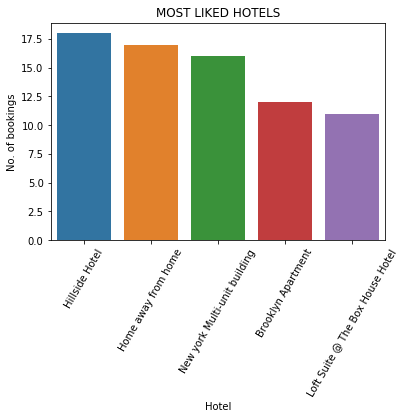

In [24]:
df1 = df.groupby(['name'],as_index=False).count().nlargest(5,'host_id')
df1 = df1[:5]
# plt.figure(figsize=(12,6))
a = sns.barplot(x='name',y='id',data = df1)
a.set_title('MOST LIKED HOTELS')
a.set_ylabel('No. of bookings')
a.set_xlabel('Hotel')
a.set_xticklabels(a.get_xticklabels(), rotation=60);
plt.show()

# 10. Top Hosts with the most listings

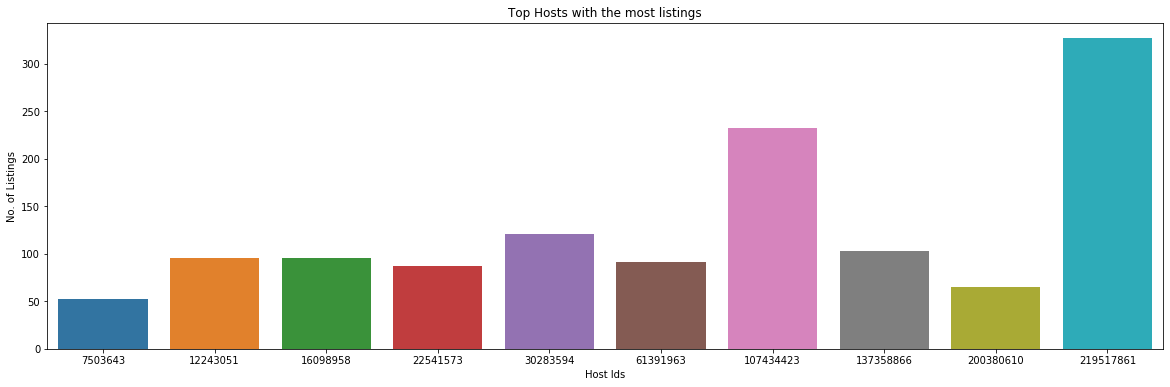

In [25]:
top_host = df.host_id.value_counts()
top_host.head(5)

top_host_df= pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
df1=top_host_df.head(10)

fig, ax = plt.subplots(figsize=(20, 6))
a=sns.barplot(data=df1, x="Host_ID",y='P_Count')

a.set_title('Top Hosts with the most listings')
a.set_xlabel('Host Ids')
a.set_ylabel('No. of Listings')
plt.show()

#### Observation: 

- Based on the graph, we can identify the top 10 individuals who own or manage the highest number of Airbnb properties in New York City.<br> The leading host boasts an impressive number of over 300 listings.

# 11. Number of available rooms in different neighbourhood

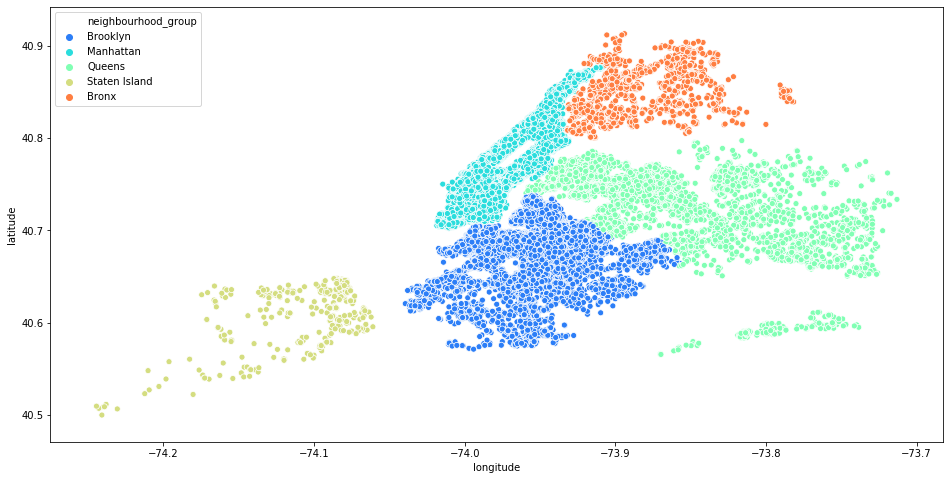

In [26]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.neighbourhood_group,palette="rainbow")
plt.show()

#### Observation : 
- We can see that hotel rooms are more densely populated in Brooklyn and are a lot more spread in Queens

# 12. Distribution of types of rooms in different neighbourhood groups

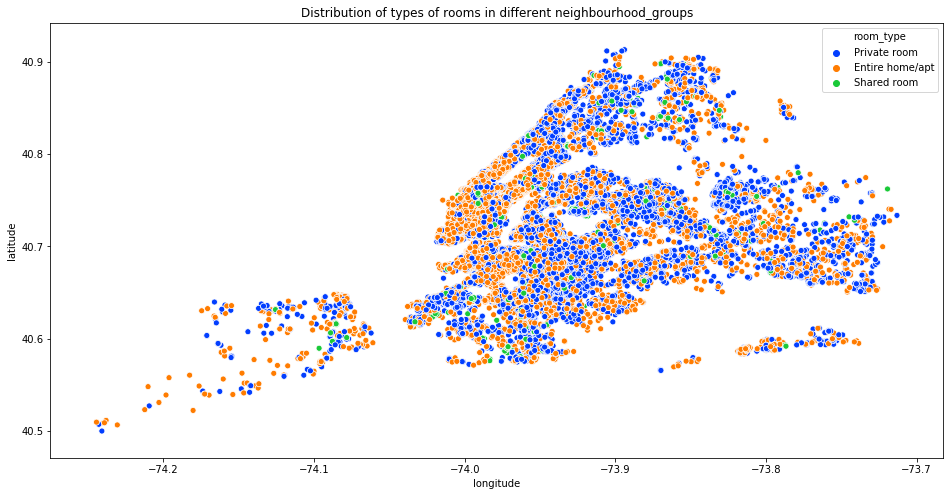

In [27]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.room_type,palette='bright')
ax.set_title('Distribution of types of rooms in different neighbourhood_groups')
plt.show()

#### Observation:

- By observing the latitude and longitude data visualization, it becomes apparent that Brooklyn and Manhattan exhibit the highest density of rooms.
- These two followed closely by Queens Island in terms of accommodation density.

# 13. Overall Price distribution

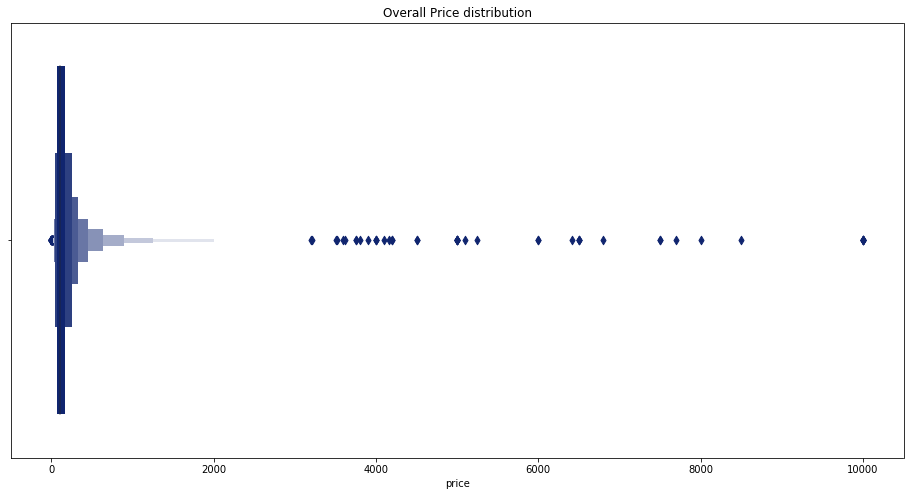

In [28]:
f,ax = plt.subplots(figsize=(16,8))
ax=sns.boxenplot(data=df,x='price',palette='dark')
ax.set_title('Overall Price distribution')
plt.show()

#### Observation: 

# 14. Overall price distribution in each NYC neighbourhood

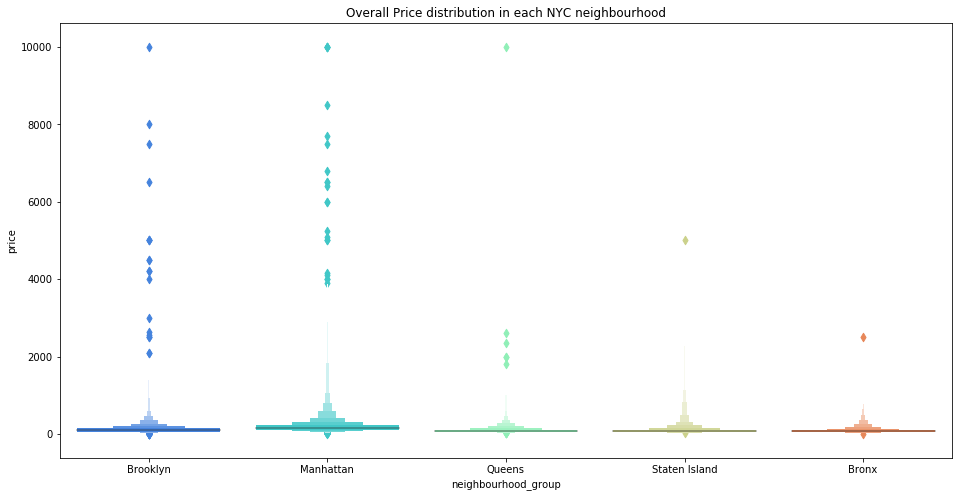

In [29]:
f,ax = plt.subplots(figsize=(16,8))
ax=sns.boxenplot(data=df,y='price',x='neighbourhood_group', palette ='rainbow')

ax.set_title('Overall Price distribution in each NYC neighbourhood')
plt.show()

#### Observation:

- We observe that the price ranges between 0 to 180 USD .
- We can also see the price reaching ranges close to $10,000 in Manhattan and Broooklyn.

# 15. average price for each type of room per neighbourhood

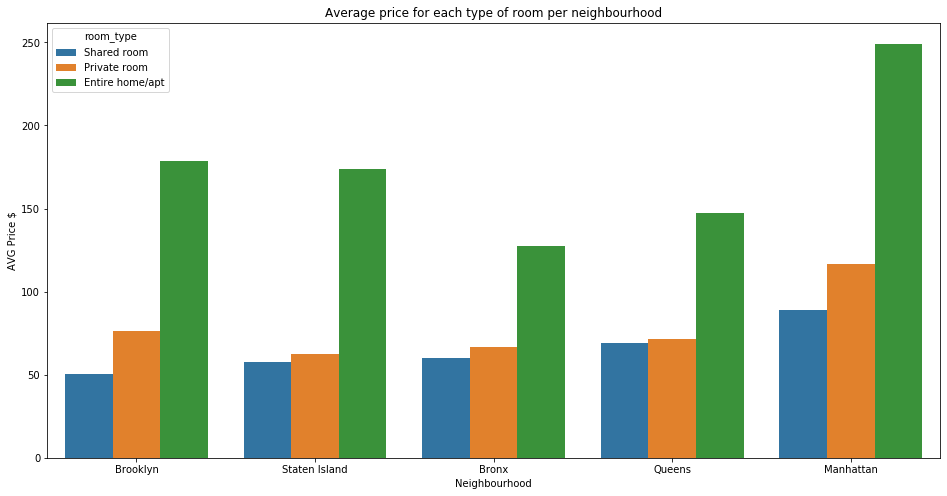

In [30]:
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True).reset_index()
f,ax = plt.subplots(figsize=(16,8))
ax=sns.barplot(x="neighbourhood_group",
           y="price",
           hue="room_type",
           data=df1)

ax.set_title('Average price for each type of room per neighbourhood')
ax.set_ylabel('AVG Price $')
ax.set_xlabel('Neighbourhood')
plt.show()

#### Conclusion : 
- Brooklyn offers afforable shared rooms options.
- Entire Home/Apartment type stays are more expensive compared to other 2 types of rooms listed .
- The average price for a private room in Manhattan is notably high, indicating that it is relatively expensive compared to other neighborhoods.
- Additionally, even shared rooms in Manhattan tend to be more expensive than private rooms in other neighborhoods.
- These observations strongly suggest that Manhattan is indeed the pricier choice for accommodations compared to other localities.

# 16. Average Price per night for each neighbourhood

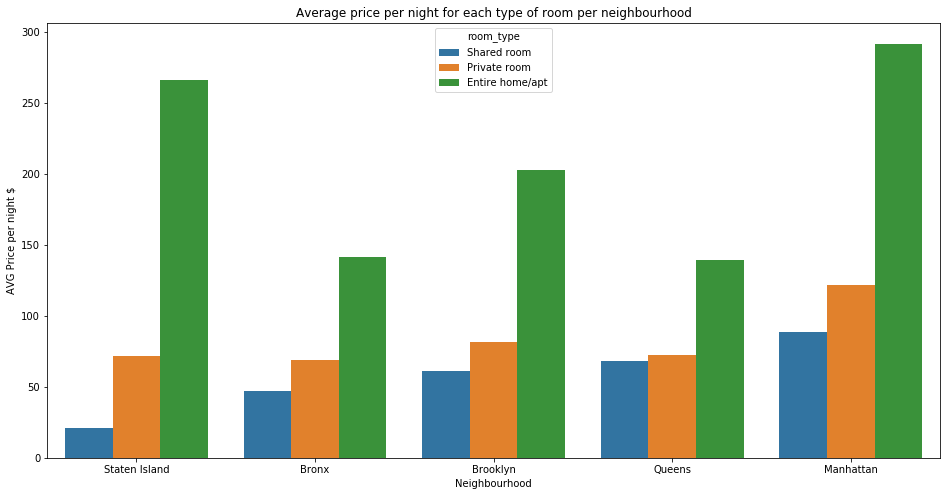

In [31]:
df = df[df['minimum_nights']==1]

df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True).reset_index()
f,ax = plt.subplots(figsize=(16,8))
ax=sns.barplot(x="neighbourhood_group",
           y="price",
           hue="room_type",
           data=df1)

ax.set_title('Average price per night for each type of room per neighbourhood')
ax.set_ylabel('AVG Price per night $')
ax.set_xlabel('Neighbourhood')
plt.show()

#### Conclusion :

# 17. Top 20 most expensive neighbourhood

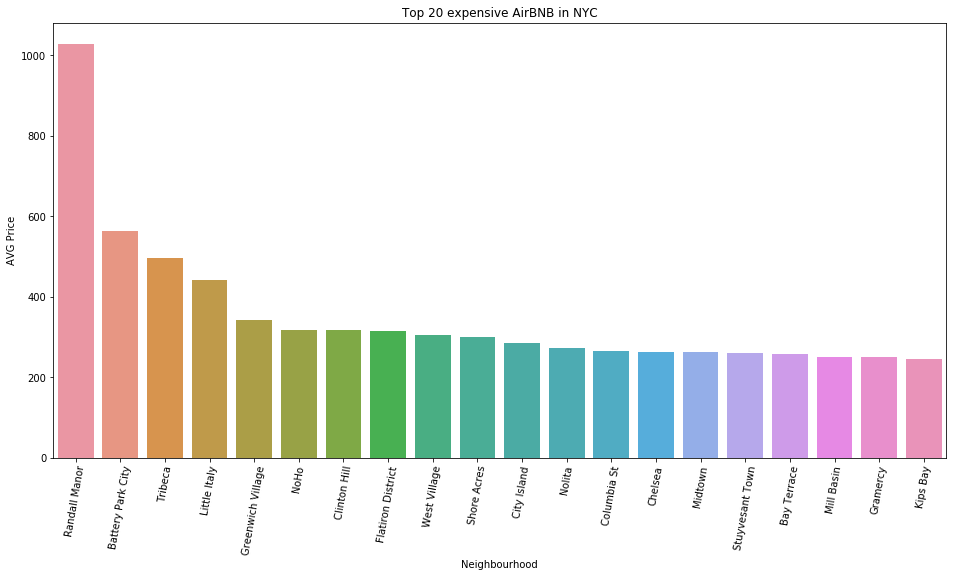

In [32]:
df4 = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).reset_index().head(20)
df4

f,ax = plt.subplots(figsize=(16,8))
ax=sns.barplot(x="neighbourhood",
           y="price",
           data=df4)

ax.set_title('Top 20 expensive neighbourhood')
ax.set_ylabel('AVG Price')
ax.set_xlabel('Neighbourhood')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
plt.show()

#### Conclusion :

# 18. Top 20 least expensive neighbourhood

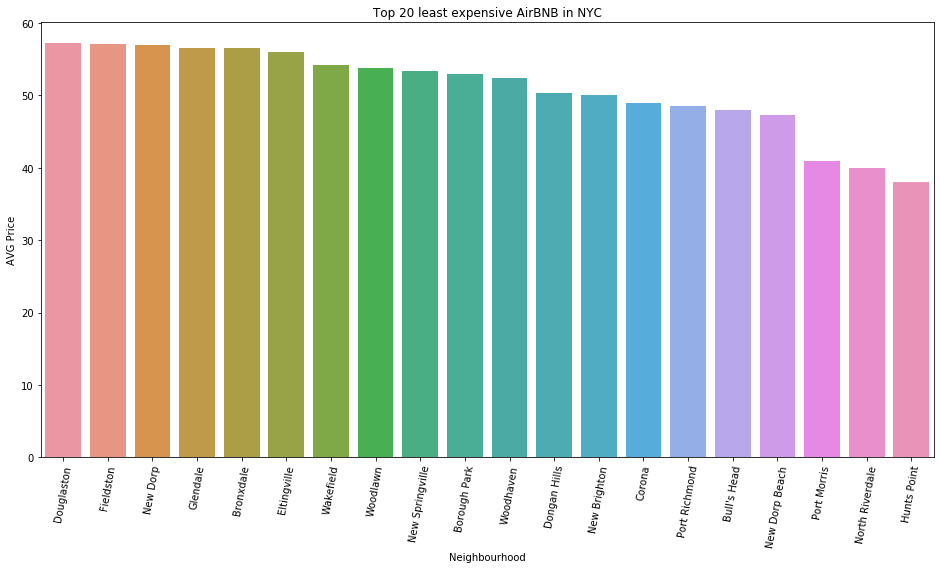

In [33]:
df4_1 = df.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).reset_index().tail(20)

f,ax = plt.subplots(figsize=(16,8))
ax=sns.barplot(x="neighbourhood",
           y="price",
           data=df4_1)

ax.set_title('Top 20 least expensive neighbourhood')
ax.set_ylabel('AVG Price')
ax.set_xlabel('Neighbourhood')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
plt.show()

#### Observation: 
- Randall Manor tops the list of the 20 most expensive AirBnb in NYC and Hunts Point is the least expensive based on mean price

# 19. Review VS Neighbourhood Group

Text(0.5, 0, 'Neighbourhood Group')

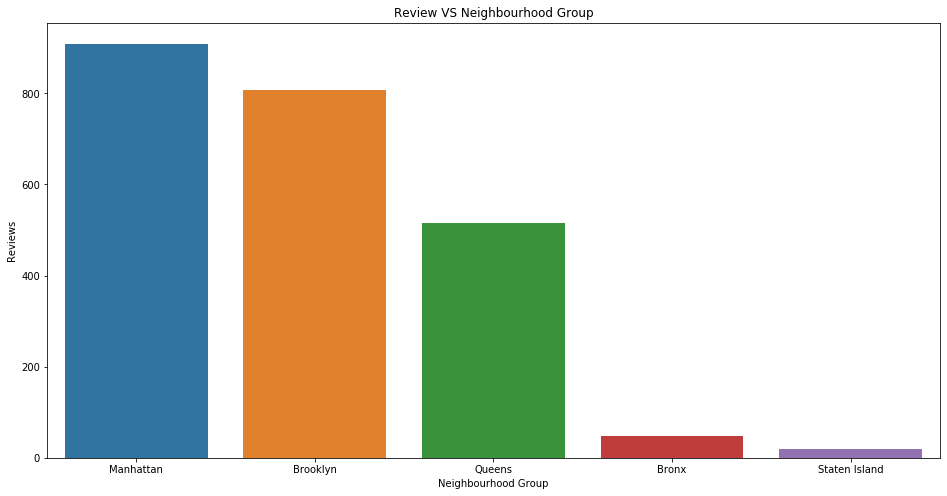

In [34]:
df50 = df[df['number_of_reviews']>=50]  # consider min 50 reviews
df50 = df50['neighbourhood_group'].value_counts()
df5= pd.DataFrame(df50)
df5.reset_index(inplace=True)
df5.rename(columns={'index':'neighbourhood_group', 'neighbourhood_group':'Review_Count'}, inplace=True)
df5
f,ax = plt.subplots(figsize=(16,8))
ax=sns.barplot(x="neighbourhood_group",
           y="Review_Count",
           data=df5)

ax.set_title('Review VS Neighbourhood Group')
ax.set_ylabel('Reviews')
ax.set_xlabel('Neighbourhood Group')

#### Observation:
- Assumption listings with over 50 reviews .
- Most reviewed listings are in Manhattan with close to a 1000 reviews whereas Staten Island shows a drastical difference in the review count less than 100 .
- Staten Island seems to be less popular option based on the review count .

# 20. Holiday Review

In [35]:
#df6= df[df['number_of_reviews']>=50]  # consider min 50 reviews

df6=newdf[['host_id','host_name','neighbourhood_group','neighbourhood','number_of_reviews','last_review']]
df6=df6[~df6['last_review'].isnull()]

# extract all december records

df6['last_review'] = pd.to_datetime(df6['last_review'], format = '%Y-%m-%d')

df6['Month'] = df6['last_review'].dt.strftime('%m')

df6 =df6[df6['Month'] == '12']  # december data

In [36]:
#Most reviewed neighbourhood_group during December
df6.groupby('neighbourhood_group')['number_of_reviews'].count().sort_values(ascending =False).reset_index()

,neighbourhood_group,number_of_reviews
0,Manhattan,887
1,Brooklyn,700
2,Queens,152
3,Bronx,29
4,Staten Island,2


# 21. December Reviews for each Neighbourhood Group

Text(0.5, 0, 'Neighbourhood Group')

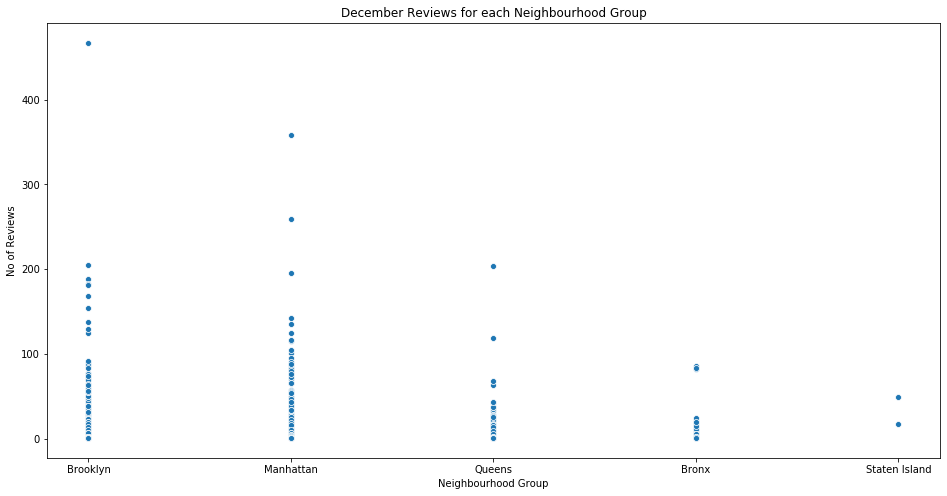

In [37]:
f,ax = plt.subplots(figsize=(16,8))

#df6= df6[df6['number_of_reviews']>=20]  # consider min 50 reviews
ax=sns.scatterplot(x="neighbourhood_group",
           y="number_of_reviews",
           data=df6)
ax.set_title('December Reviews for each Neighbourhood Group')
ax.set_ylabel('No of Reviews')
ax.set_xlabel('Neighbourhood Group')

#### Observation:
- Assuming December as the peak holiday month in a year 
- the graph shows that Staten Island is not as popular as Manhattan and Brooklyn amongst tourists/guests holidaying during the month of December .

In [38]:
newdf

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [39]:
df7=newdf[['host_id','host_name','neighbourhood_group','neighbourhood','price','number_of_reviews','last_review']]
df7=df7[~df7['last_review'].isnull()]

In [40]:
df7['last_review'] = pd.to_datetime(df7['last_review'], format = '%Y-%m-%d')

In [41]:
df7['Year'] = df7['last_review'].dt.strftime('%Y')
df7['Month'] = df7['last_review'].dt.strftime('%b')

# 22. Monthly Price distribution 2017,18,19.

Text(0.5, 0, 'Months')

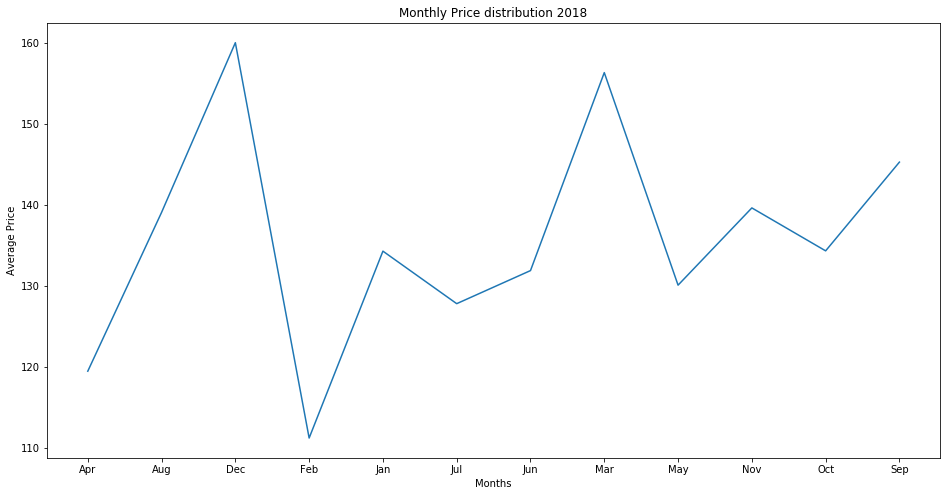

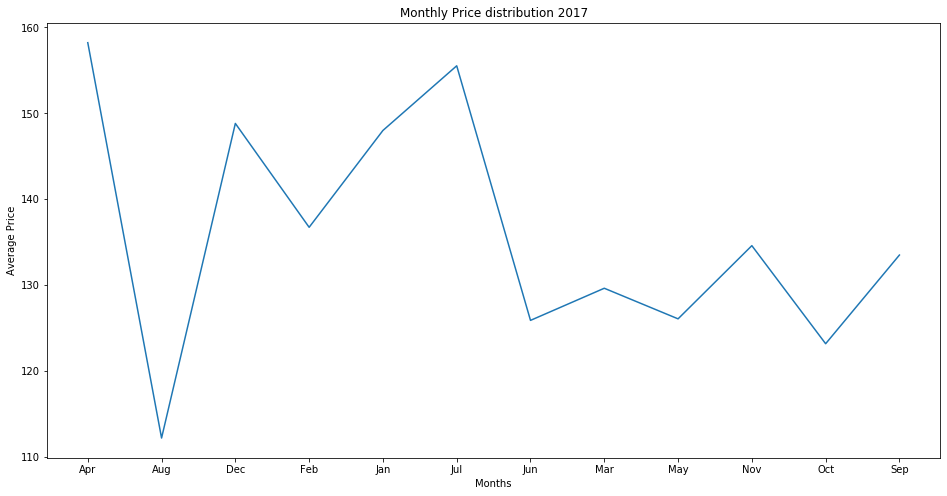

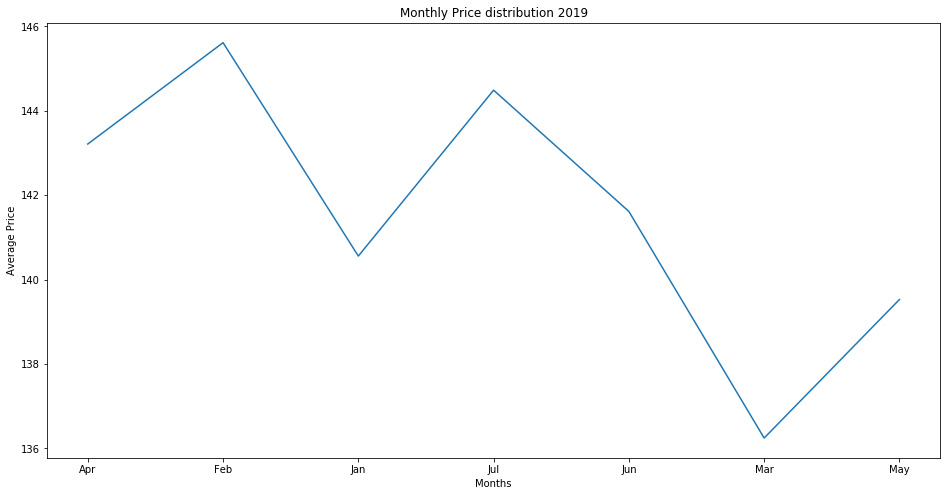

In [42]:
df_18=df7[df7['Year']=='2018']

df_18=df_18.groupby('Month')['price'].mean().reset_index()
df_18=df_18.sort_values('Month', key = lambda x : pd.to_datetime(x, format='%b').dt.month)

#Monthly Price distribution 2018
f,ax = plt.subplots(figsize=(16,8))
ax=sns.lineplot(data=df_18, x="Month", y="price")
ax.set_title('Monthly Price distribution 2018')
ax.set_ylabel('Average Price')
ax.set_xlabel('Months')
df_17=df7[df7['Year']=='2017']
df_17=df_17.groupby('Month')['price'].mean().reset_index()
df_17=df_17.sort_values('Month', key = lambda x : pd.to_datetime(x, format='%b').dt.month)



#Monthly Price distribution 2017
f,ax = plt.subplots(figsize=(16,8))
ax=sns.lineplot(data=df_17, x="Month", y="price")
ax.set_title('Monthly Price distribution 2017')
ax.set_ylabel('Average Price')
ax.set_xlabel('Months')


#Monthly Price distribution 2019
df_19=df7[df7['Year']=='2019']
df_19=df_19.groupby('Month')['price'].mean().reset_index()
df_19=df_19.sort_values('Month', key = lambda x : pd.to_datetime(x, format='%b').dt.month)

f,ax = plt.subplots(figsize=(16,8))
ax=sns.lineplot(data=df_19, x="Month", y="price")
ax.set_title('Monthly Price distribution 2019')
ax.set_ylabel('Average Price')
ax.set_xlabel('Months')

#### Observation: 
- Considering the last 3 financila years (2017 to 2019)
- The pricing trend in 2018 shows a steady increase from August to December .
- Every year there are peaks and drop in the avergae price per host, which in turn means the cost increases depending on the seasonal/holiday months demand . 
- Pricing fluctuates throughout the year to compete with the presumed demand.